✅ Data Loaded Successfully!
             DATETIME  Target                        FEEDER       Date
0 2025-09-01 10:00:00  66.359  220 KV ROHINI-2 SEC-29 CKT-2 2025-09-01
1 2025-09-01 21:45:00  68.088  220 KV ROHINI-2 SEC-29 CKT-2 2025-09-01
2 2025-09-01 05:30:00  68.841  220 KV ROHINI-2 SEC-29 CKT-2 2025-09-01
3 2025-09-01 10:15:00  66.350  220 KV ROHINI-2 SEC-29 CKT-2 2025-09-01
4 2025-09-01 13:45:00  66.569  220 KV ROHINI-2 SEC-29 CKT-2 2025-09-01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23808 entries, 0 to 23807
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATETIME  23808 non-null  datetime64[ns]
 1   Target    23808 non-null  float64       
 2   FEEDER    23808 non-null  object        
 3   Date      23808 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 744.1+ KB
None

Missing Values:
DATETIME    0
Target      0
FEEDER      0
Date        0
dtype: int6

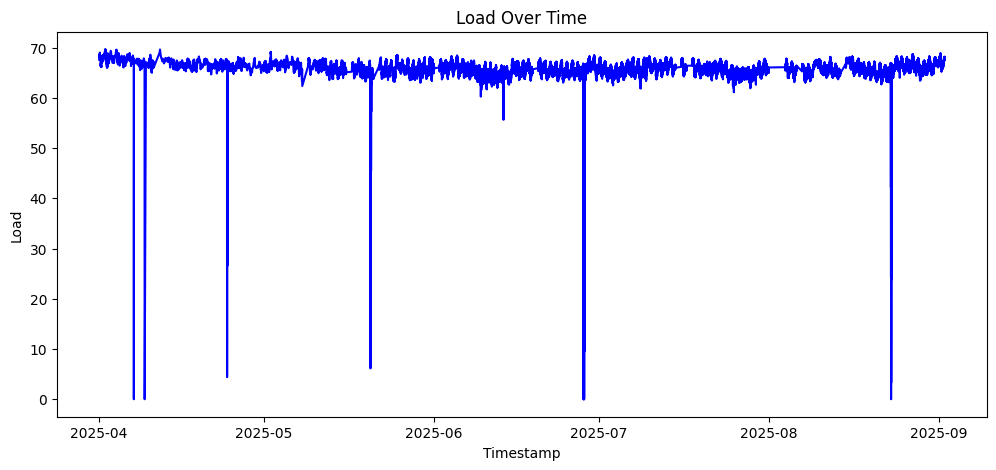

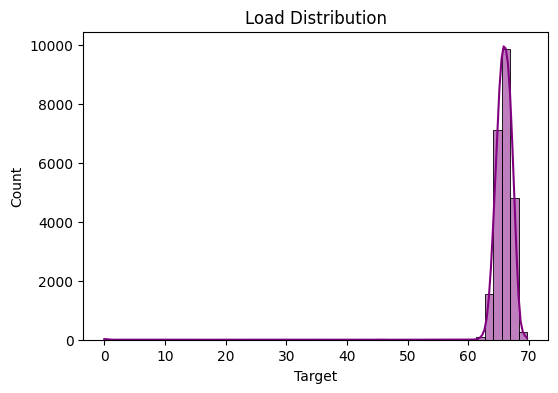

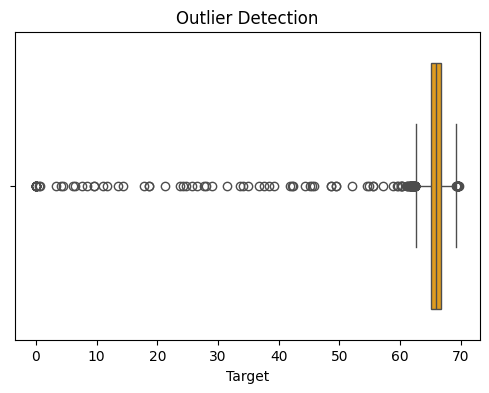

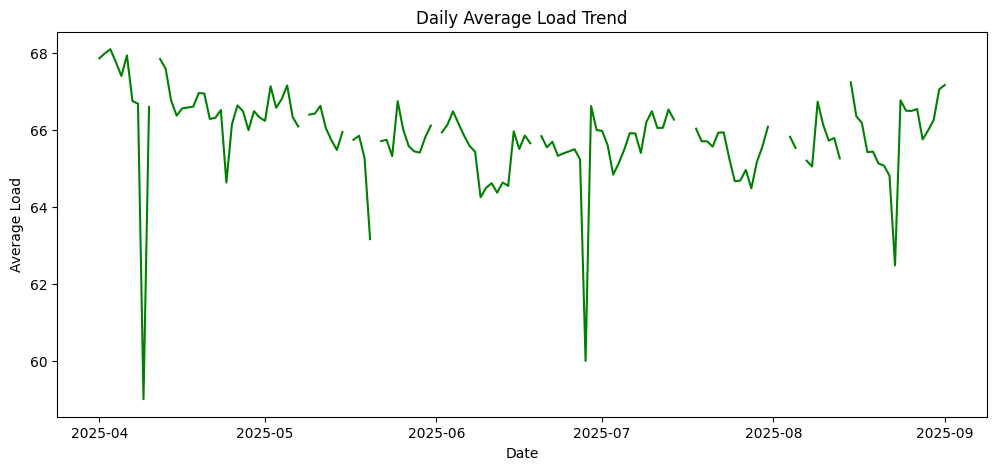

✅ EDA Completed Successfully!


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 24, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - loss: 0.0354 - val_loss: 9.6180e-04
Epoch 2/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - loss: 0.0012 - val_loss: 9.2599e-04
Epoch 3/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - loss: 8.9711e-04 - val_loss: 0.0013
Epoch 4/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - loss: 0.0012 - val_loss: 8.7454e-04
Epoch 5/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - loss: 0.0010 - val_loss: 9.5559e-04
Epoch 6/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - loss: 7.1747e-04 - val_loss: 9.2164e-04
Epoch 7/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - loss: 6.4286e-04 - val_loss: 8.6686e-04
Epoch 8/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - loss: 5.9778e-04 - val_loss: 8.5182e-04
Epoch 9/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - loss: 8.3770e-04 - val_loss: 0.0010
Epoch 10/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - loss: 8.4699e-04 - val_loss: 9.1011e-04
Epoch 11/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - loss: 

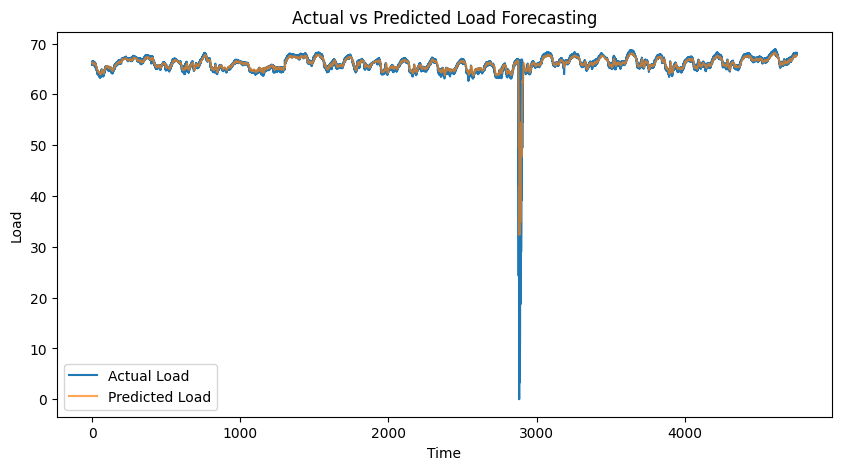

In [ ]:
# ==============================================
# ⚡ Load Forecasting Project using LSTM + EDA
# ==============================================

# ---- 1️⃣ Import Libraries ----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ---- 2️⃣ Load Data from Azure Blob ----
blob_url = "https://tpddldatalakeprod.blob.core.windows.net/analyticalzone/TPDDL/VOLTAGE_FORECASTING/Prediction_Voltage_Forecasting/Actual_Data_Filterd/Actual_Voltage_Data.parquet"
sas_token = "sp=r&st=2025-10-06T05:26:34Z&se=2025-11-01T13:41:34Z&spr=https&sv=2024-11-04&sr=b&sig=yCGP7mwRBL704owrYsm5BWoqycCCTHo8QmNDBLREjN8%3D"
 # Replace with your SAS token

url_with_sas = f"{blob_url}?{sas_token}"
df = pd.read_parquet(url_with_sas, engine='pyarrow')

print("✅ Data Loaded Successfully!")
print(df.head())
print(df.info())

# ============================================
# 🧩 3️⃣ Exploratory Data Analysis (EDA)
# ============================================

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nStatistics:")
print(df.describe())

# Convert timestamp
df = df.rename(columns={'DATETIME': 'timestamp'})  # Rename if needed
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by='timestamp')
df.set_index('timestamp', inplace=True)

# Plot load over time
plt.figure(figsize=(12,5))
plt.plot(df['Target'], color='blue')
plt.title("Load Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Load")
plt.show()

# Histogram
plt.figure(figsize=(6,4))
sns.histplot(df['Target'], bins=50, kde=True, color='purple')
plt.title("Load Distribution")
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Target'], color='orange')
plt.title("Outlier Detection")
plt.show()

# Daily average trend
daily_load = df['Target'].resample('D').mean()
plt.figure(figsize=(12,5))
plt.plot(daily_load, color='green')
plt.title("Daily Average Load Trend")
plt.xlabel("Date")
plt.ylabel("Average Load")
plt.show()

# Correlation heatmap (if multiple numeric columns)
numeric_df = df.select_dtypes(include=np.number)
if numeric_df.shape[1] > 1:
    plt.figure(figsize=(8,5))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

print("✅ EDA Completed Successfully!")

# ============================================
# 🧮 4️⃣ Data Preprocessing for LSTM
# ============================================

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[['Target']])

# Create sequences for time-series
def create_dataset(data, time_step=24):
    X, y = [], []
    for i in range(len(data)-time_step):
        X.append(data[i:i+time_step, 0])
        y.append(data[i+time_step, 0])
    return np.array(X), np.array(y)

time_step = 24  # Use past 24 hours to predict next hour
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Train-test split
train_size = int(len(X)*0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# ============================================
# 🤖 5️⃣ Build and Train LSTM Model
# ============================================

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step,1)),
    LSTM(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=20, batch_size=32, verbose=1)

# ============================================
# 📈 6️⃣ Predictions and Visualization
# ============================================

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))
y_test_real = scaler.inverse_transform(y_test.reshape(-1,1))

plt.figure(figsize=(10,5))
plt.plot(y_test_real, label='Actual Load')
plt.plot(predictions, label='Predicted Load', alpha=0.7)
plt.title("Actual vs Predicted Load Forecasting")
plt.xlabel("Time")
plt.ylabel("Load")
plt.legend()
plt.show()


In [ ]:
print("Shape of the DataFrame:")
print(df.shape)

Shape of the DataFrame:
(23808, 3)
